In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [67]:
df.sort_values(by='Year',inplace= True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
54,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 37 to 5
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.5+ KB


In [69]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

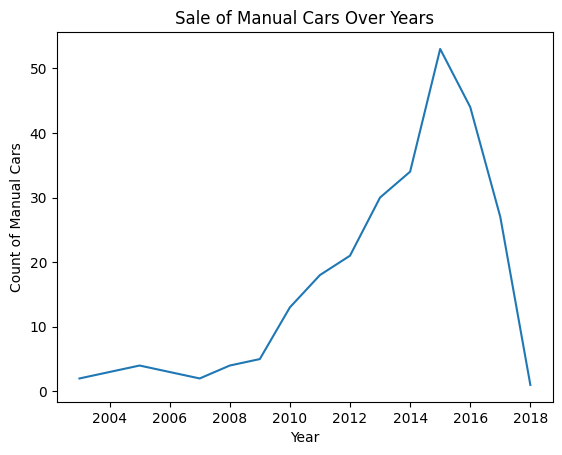

In [70]:
manual_cars = df[df['Transmission'] == 'Manual']

# Group by year and count the occurrences of manual cars for each year
manual_cars_yearly_count = manual_cars.groupby('Year').size().reset_index(name='Count')

sns.lineplot(data=manual_cars_yearly_count, x='Year', y='Count')
plt.xlabel('Year')
plt.ylabel('Count of Manual Cars')
plt.title('Sale of Manual Cars Over Years')
plt.show()

In [71]:
skewness = manual_cars['Year'].skew()
print('skewness:',skewness)

kurtosis = manual_cars['Year'].kurt()
print("kurtosis:",kurtosis)

skewness: -1.2670588346159055
kurtosis: 1.770800881234643


skewness - Left skewed distribution / -ve skewness

kurtosis - positive - sharper peak

Manual cars sales decreasing after 2016


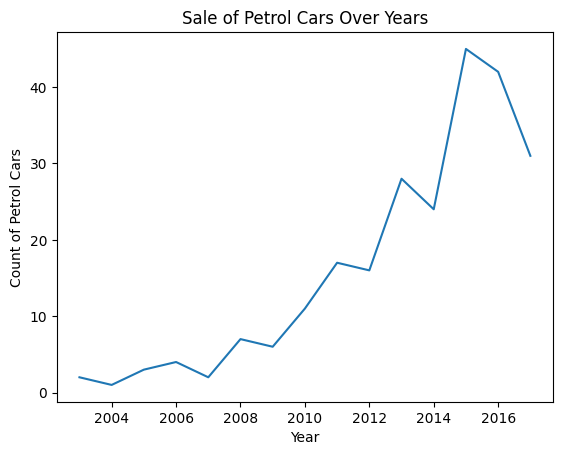

In [72]:
petrol_cars = df[df['Fuel_Type'] == 'Petrol']

# Group by year and count the occurrences of petrol cars for each year
petrol_cars_yearly_count = petrol_cars.groupby('Year').size().reset_index(name='Count')

sns.lineplot(data=petrol_cars_yearly_count, x='Year', y='Count')
plt.xlabel('Year')
plt.ylabel('Count of Petrol Cars')
plt.title('Sale of Petrol Cars Over Years')
plt.show()

In [73]:
skewness = petrol_cars['Year'].skew()
print('skewness:',skewness)

kurtosis = petrol_cars['Year'].kurt()
print("kurtosis:",kurtosis)

skewness: -1.1853691764062808
kurtosis: 1.1526637889085096


skewness - Left skewed distribution / -ve skewness

kurtosis - positive - sharper peak

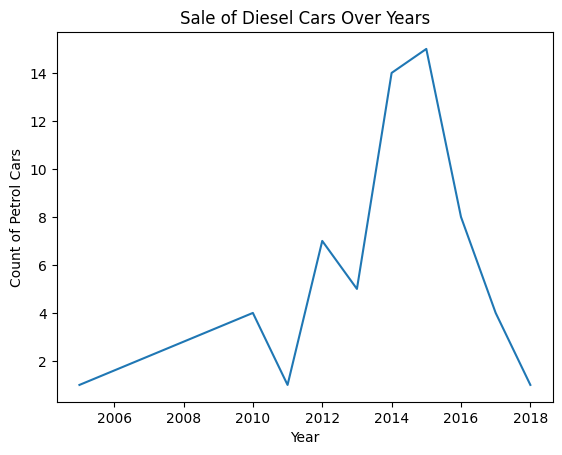

In [74]:
diesel_cars = df[df['Fuel_Type'] == 'Diesel']

# Group by year and count the occurrences of petrol cars for each year
diesel_cars_yearly_count = diesel_cars.groupby('Year').size().reset_index(name='Count')

sns.lineplot(data=diesel_cars_yearly_count, x='Year', y='Count')
plt.xlabel('Year')
plt.ylabel('Count of Petrol Cars')
plt.title('Sale of Diesel Cars Over Years')
plt.show()

In [75]:
skewness = diesel_cars['Year'].skew()
print('skewness:',skewness)

kurtosis = diesel_cars['Year'].kurt()
print("kurtosis:",kurtosis)

skewness: -1.3504298544268134
kurtosis: 3.633602617605004


skewness - Left skewed distribution / -ve skewness

kurtosis - positive - sharper peak

In [76]:
df['Price_Drop'] = df['Present_Price'] - df['Selling_Price']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Drop
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,5.73
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0,10.85
54,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0,7.46
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,9.97


Bivariate Analysis

In [77]:
newdf = df[['Owner', 'Kms_Driven','Price_Drop']]

correlation = newdf.corr()
print(correlation)

covariance = newdf.cov()
print(covariance)

               Owner  Kms_Driven  Price_Drop
Owner       1.000000    0.089216    0.107415
Kms_Driven  0.089216    1.000000    0.333832
Price_Drop  0.107415    0.333832    1.000000
                 Owner    Kms_Driven    Price_Drop
Owner         0.061462  8.601011e+02      0.128589
Kms_Driven  860.101074  1.512190e+09  62685.500550
Price_Drop    0.128589  6.268550e+04     23.317030


no. of owners increases -> price_drop increases

more no. of owners -> more kms driven

more kms driven -> more price drop

<Axes: xlabel='Kms_Driven', ylabel='Price_Drop'>

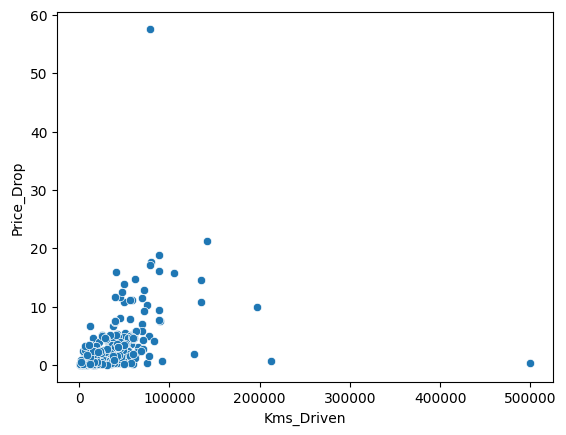

In [78]:
sns.scatterplot(x=df['Kms_Driven'], y=df['Price_Drop'])

<Axes: xlabel='Price_Drop', ylabel='count'>

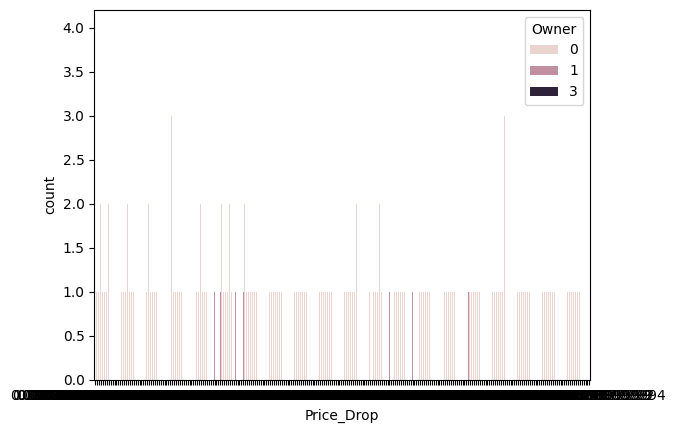

In [89]:
sns.countplot(data=df,x='Price_Drop',hue='Owner')

In [79]:
newdf = df[['Year', 'Price_Drop']]

correlation = newdf.corr()
print(correlation)

covariance = newdf.cov()
print(covariance)

                Year  Price_Drop
Year        1.000000   -0.333746
Price_Drop -0.333746    1.000000
                Year  Price_Drop
Year        8.361085   -4.659981
Price_Drop -4.659981   23.317030


older car -> less price drop

In [80]:
#describe only numeric cols
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Price_Drop
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,2.967176
std,2.891554,5.082812,8.644115,38886.883882,0.247915,4.828771
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.030000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.390000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,1.640000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,3.350000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,57.600000


In [81]:
#describe only categorical cols
df.describe(include=['object'])

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [82]:
#describe all columns (both numeric & categorical)
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Drop
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189,2.967176
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915,4.828771
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000,0.030000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000,0.390000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000,1.640000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000,3.350000


Describe continous value

Total Sales per year

In [83]:
sales_per_year = df.groupby('Year')['Selling_Price'].describe()
sales_per_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2003,2.0,1.300000,1.343503,0.35,0.8250,1.300,1.7750,2.25
2004,1.0,1.500000,NaN,1.50,1.5000,1.500,1.5000,1.50
2005,4.0,2.487500,1.565469,0.20,2.1125,3.120,3.4950,3.51
2006,4.0,1.437500,1.081184,0.10,0.8125,1.575,2.2000,2.50
2007,2.0,0.160000,0.056569,0.12,0.1400,0.160,0.1800,0.20
2008,7.0,1.002857,1.471753,0.17,0.2000,0.250,1.1000,4.00
2009,6.0,2.816667,1.085664,0.90,2.4375,3.175,3.5375,3.80
2010,15.0,5.262667,8.767003,0.16,0.4850,2.650,5.0000,35.00
2011,19.0,2.375263,1.476977,0.15,0.7750,2.700,2.9750,4.50


<Axes: xlabel='Year'>

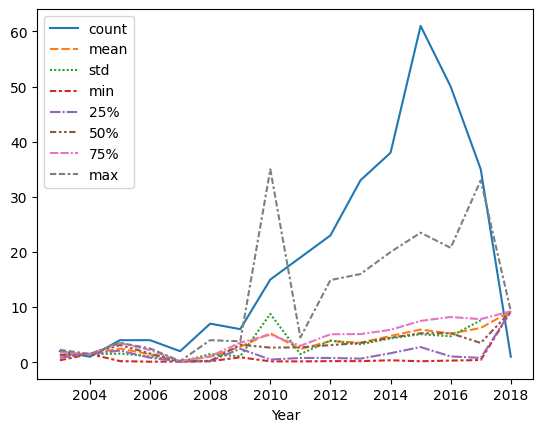

In [84]:
sns.lineplot(sales_per_year)

Describe categorical value

Petrol/Diesel Vehicles sold per year

In [85]:
Fuel_Type_Sales = df.groupby('Year')['Fuel_Type']
Fuel_Type_Sales.describe(include='object')


,count,unique,top,freq
Year,,,,
2003,2,1,Petrol,2
2004,1,1,Petrol,1
2005,4,2,Petrol,3
2006,4,1,Petrol,4
2007,2,1,Petrol,2
2008,7,1,Petrol,7
2009,6,1,Petrol,6
2010,15,2,Petrol,11
2011,19,3,Petrol,17


In [86]:
# Pivot the data to create a summary table of petrol and diesel cars sold per year
summary_table = df.pivot_table(index='Year', columns='Fuel_Type', aggfunc='size', fill_value=0)
summary_table

Fuel_Type,CNG,Diesel,Petrol
Year,,,
2003,0,0,2
2004,0,0,1
2005,0,1,3
2006,0,0,4
2007,0,0,2
2008,0,0,7
2009,0,0,6
2010,0,4,11
2011,1,1,17


Univariate analysis of categorical value

<Axes: xlabel='count', ylabel='Transmission'>

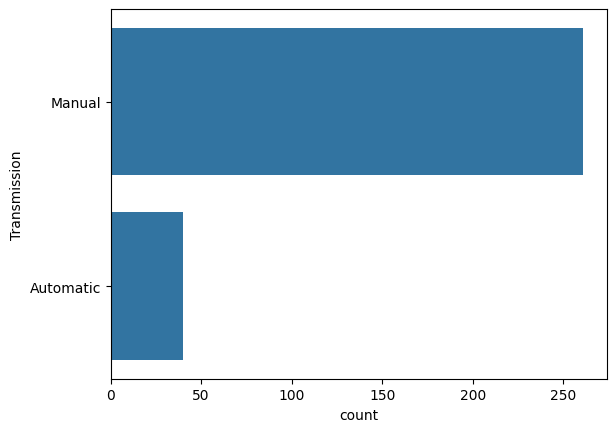

In [87]:
sns.countplot(df['Transmission'])

Univariate analysis of continous column

<Axes: xlabel='Selling_Price', ylabel='Count'>

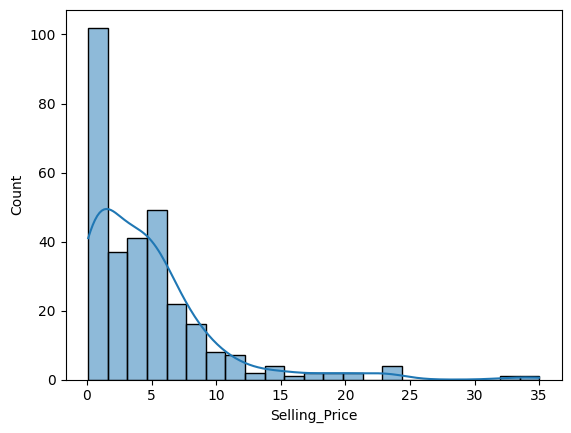

In [94]:
sns.histplot(df['Selling_Price'],kde=True)